In [ ]:
!pip install interpret


In [ ]:
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from interpret.blackbox import LimeTabular
from interpret import show
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import shap

In [ ]:
file = pd.read_csv('/content/Loan_default2.csv')

In [ ]:
file = file.drop(columns='LoanID')

In [ ]:
#select oreturn only those fetaure that have contionous value
def select_continuous_columns(dataframe):
    continuous_columns = []
    for column in dataframe.columns:
        if dataframe[column].dtype in ['int64', 'float64']:
            continuous_columns.append(column)
    return continuous_columns

continuous_columns = select_continuous_columns(file)


#one hot encoding
def one_hot_encoding(df):
  columns = df.columns[~df.columns.isin(continuous_columns)].tolist()
  for col in columns:
      unique = df[col].unique()
      for i in unique:
          new_col_name = f"{col}_{i}"
          df[new_col_name] = (df[col] == i).astype(int)
      del df[col]
  return df

fl2 = one_hot_encoding(file)
fl2 = fl2.dropna()

In [ ]:
fl2.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,HasMortgage_No,HasDependents_Yes,HasDependents_No,LoanPurpose_Other,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Home,LoanPurpose_Education,HasCoSigner_Yes,HasCoSigner_No
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,...,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128,...,0.499986,0.500268,0.499732,0.199391,0.199117,0.200895,0.200848,0.199748,0.500108,0.499892
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379,...,0.500001,0.500001,0.500001,0.399544,0.399337,0.400671,0.400636,0.399812,0.500001,0.500001
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
fl2 = fl2.loc[:10000, :]

In [ ]:
X = fl2.drop(columns='Default', axis=1)
y = fl2['Default']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#predict
y_pred = rfc.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

F1 Score 0.474696282645069
Accuracy 0.8755622188905547


In [ ]:

X_sub = shap.sample(X_train, 100)
explaner = shap.Explainer(rfc.predict, X_sub)

In [ ]:
explaner

In [ ]:
shap_values = explaner(X_test.iloc[0:100])

PermutationExplainer explainer: 101it [01:02,  1.49it/s]


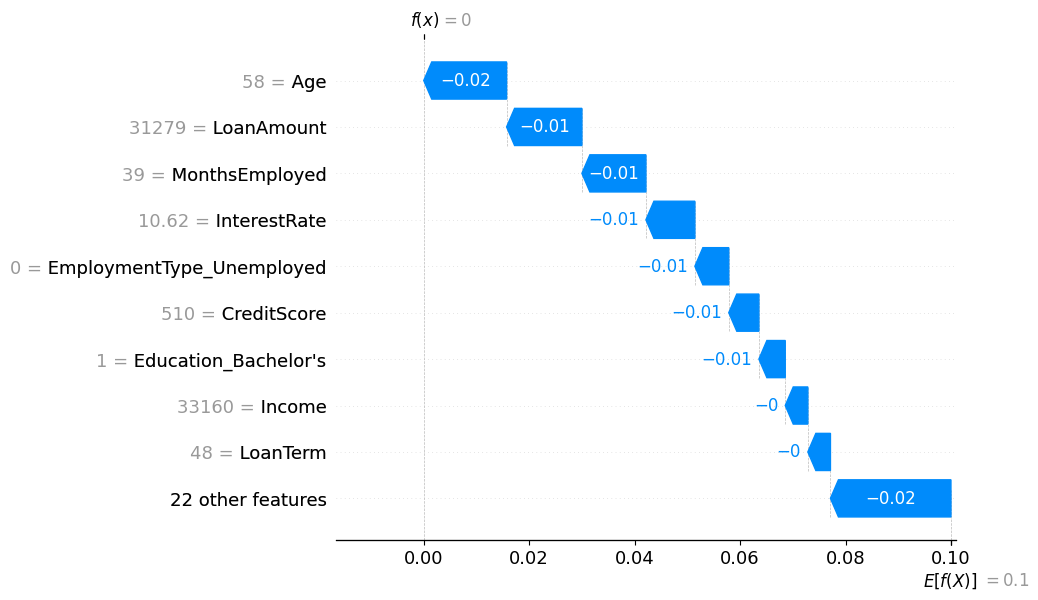

In [ ]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[5])

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0])

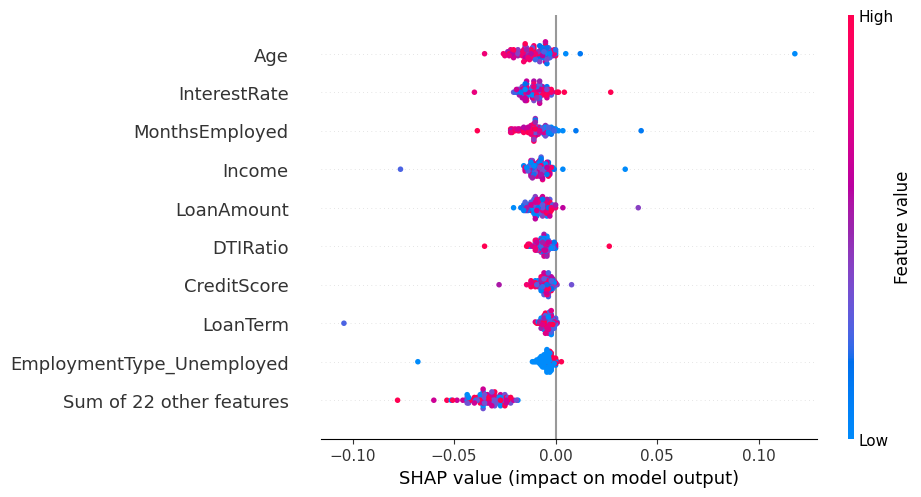

In [ ]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)